In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pyspark.sql.types as t
import pyspark.sql.functions as f
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
SEED_VALUE = 42
colors = ['r', 'g', 'b'] # Seaborn color coding

In [3]:
%%time

X_train_pd = pd.read_csv("./Dataset/train.csv")
X_train_pd.head()

CPU times: user 17.1 s, sys: 1.65 s, total: 18.7 s
Wall time: 19.5 s


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [4]:
X_train_pd.dropna(inplace=True)
X_train_pd.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07
mean,1.577541e+09,6.224257e+00,2.954028e+02,1.476051e+03,1.479876e+03,1.472882e+03,1.476050e+03,2.947317e+05,NaN,7.121863e-06
std,3.333367e+07,4.099476e+00,8.796244e+02,6.119951e+03,6.129966e+03,6.110473e+03,6.119956e+03,2.471421e+06,NaN,5.679042e-03
min,1.514765e+09,0.000000e+00,1.000000e+00,1.170400e-03,1.195000e-03,2.000000e-04,1.171400e-03,-3.662812e-01,-inf,-5.093509e-01
25%,1.549306e+09,3.000000e+00,2.200000e+01,2.808670e-01,2.819000e-01,2.800000e-01,2.808736e-01,1.493896e+02,2.808644e-01,-1.694353e-03
50%,1.578971e+09,6.000000e+00,6.900000e+01,1.486842e+01,1.489000e+01,1.484400e+01,1.486866e+01,1.332360e+03,1.486720e+01,-4.289820e-05
75%,1.606979e+09,9.000000e+00,2.310000e+02,2.349650e+02,2.353800e+02,2.345200e+02,2.349686e+02,2.911512e+04,2.349653e+02,1.601519e-03
max,1.632181e+09,1.300000e+01,1.650160e+05,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,7.597554e+08,inf,9.641699e-01


In [5]:
X_train_pd['timestamp'] = pd.to_datetime(X_train_pd['timestamp'], unit='s')
X_train_pd.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2018-01-01 00:01:00,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,2018-01-01 00:01:00,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,2018-01-01 00:01:00,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,2018-01-01 00:01:00,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,2018-01-01 00:01:00,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


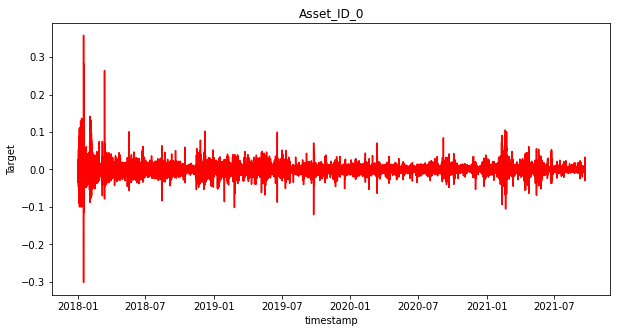

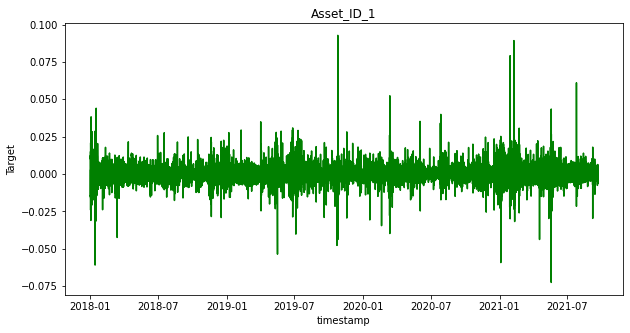

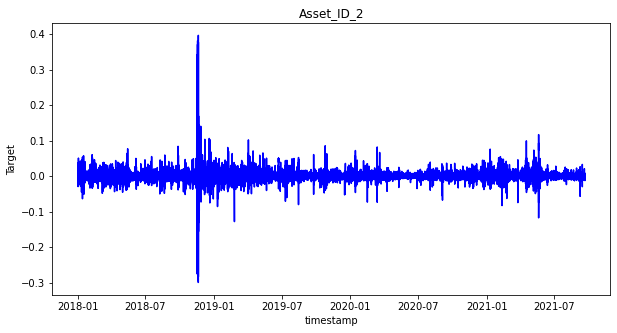

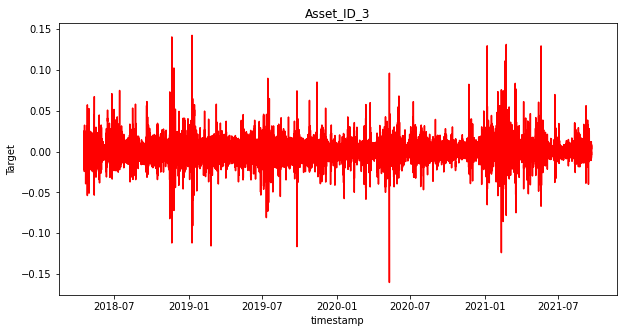

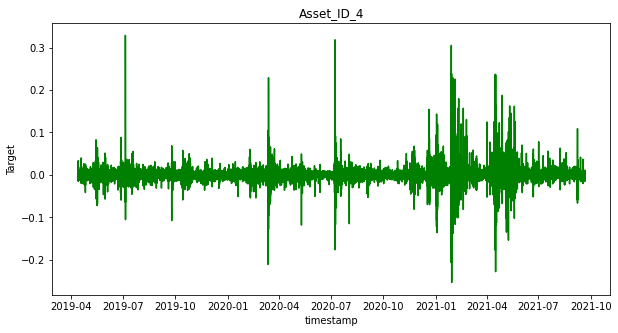

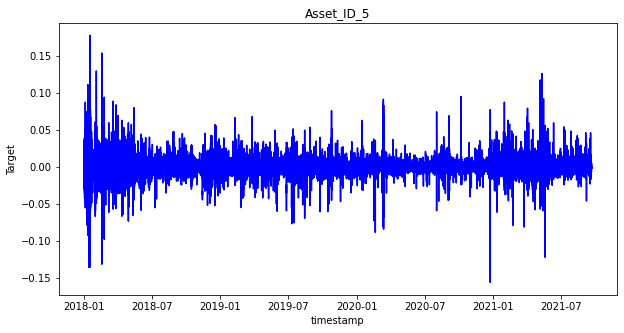

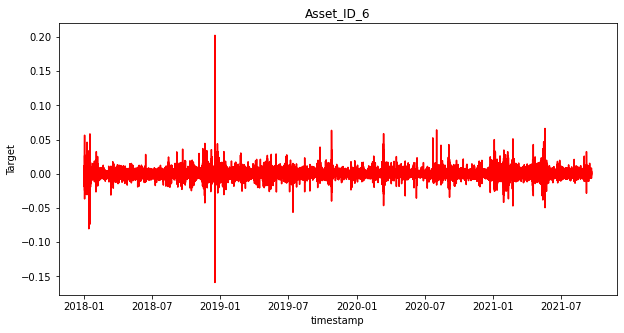

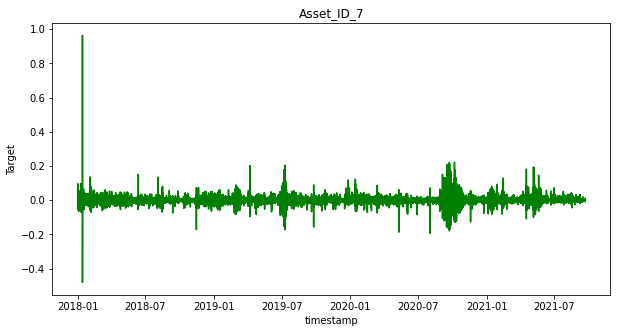

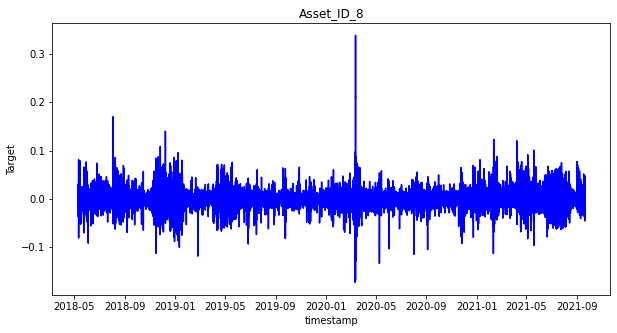

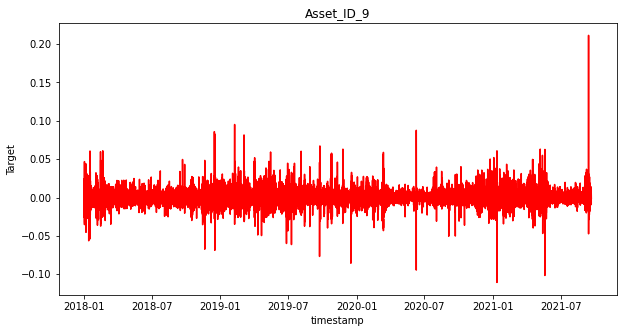

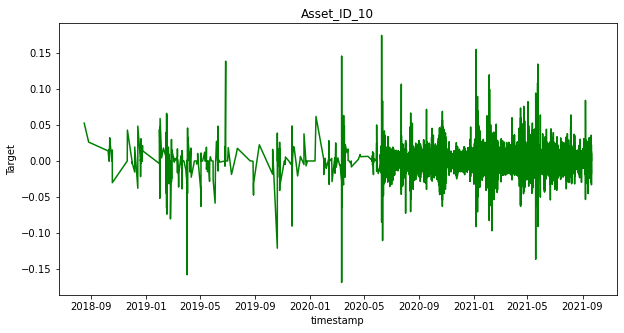

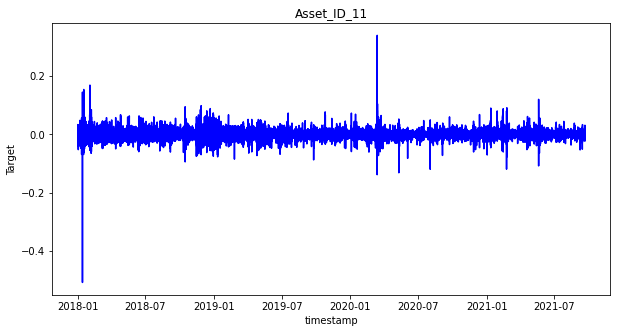

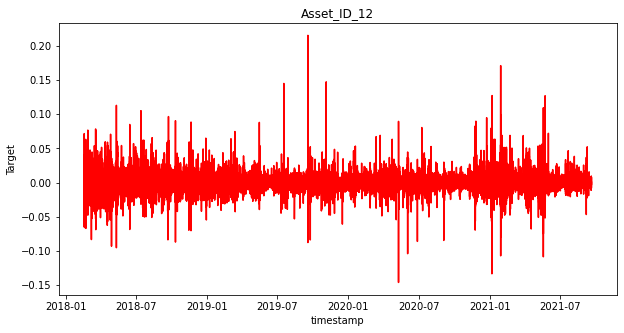

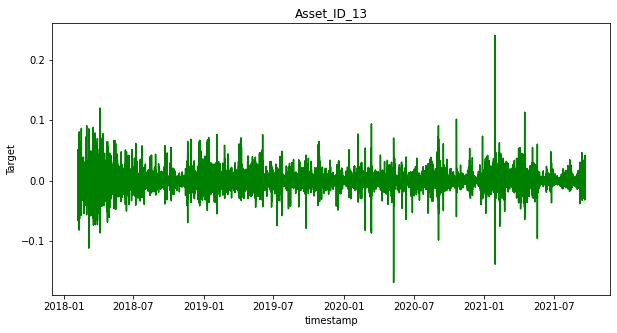

CPU times: user 6min 18s, sys: 6.34 s, total: 6min 24s
Wall time: 6min 19s


In [6]:
%%time
asset_ids = list(range(0, 14))
color_count = 0
for asset_id in asset_ids:
    temp_dataframe = X_train_pd.loc[X_train_pd['Asset_ID'] == asset_id]
    title = "Asset_ID_" + str(asset_id)
    plt.figure(figsize = (10,5))
    sns.lineplot(x='timestamp', y='Target', data=temp_dataframe, color=colors[color_count % 3])
    plt.title(title)
    plt.show()
    color_count+=1

In [7]:
y_train = X_train_pd['Target']
timestamp = X_train_pd['timestamp']
X_train_pd = X_train_pd.drop(["Target", "VWAP", "timestamp"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
X_train_1, X_test, y_train_1, y_test = train_test_split(X_train_pd, y_train, random_state=SEED_VALUE, train_size=0.80)

In [9]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

fitted_lr_model = lr_model.fit(X_train_1, y_train_1)

In [10]:
fitted_lr_model.coef_

array([-2.35027333e-06,  1.94206659e-08,  9.34639626e-07, -5.12755579e-07,
        8.32016720e-08, -5.06421801e-07,  2.45604199e-11])

In [11]:
fitted_lr_model.intercept_

1.2499944150454297e-05

In [12]:
preds = fitted_lr_model.predict(X_test)
preds

array([ 2.11456602e-05, -1.08168385e-05,  1.46151472e-05, ...,
        6.59229985e-06,  3.46810487e-05, -4.55057467e-06])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, preds)
mse

3.228664238435009e-05

In [14]:
X_train_pd = pd.concat([X_train_pd, timestamp, y_train], axis=1)
X_train_pd.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,timestamp,Target
0,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2018-01-01 00:01:00,-0.004218
1,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,2018-01-01 00:01:00,-0.014399
2,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,2018-01-01 00:01:00,-0.014643
3,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,2018-01-01 00:01:00,-0.013922
4,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,2018-01-01 00:01:00,-0.008264


In [ ]:
%%time

temp_dataframe = X_train_pd.loc[X_train_pd['Asset_ID'] == 0]
title = "Asset_ID_" + str(0)
plt.figure(figsize = (10,5))
sns.lineplot(x=timestamp, y=y_train, color=colors[color_count % 3])
plt.plot(X_test, preds)
plt.title(title)
plt.show()
color_count+=1